In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
import pandas as pd
import numpy as np
import os
import platform
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
pj_home = '/gdrive/My Drive/colab/EMNST_DACON'

os_env = platform.system()

if os_env == "Linux":
    # pj_home = "/".join(os.path.abspath(os.path.dirname(os.path.abspath('__file__'))).split("/")[:-1])
    data_home = pj_home + "/input/data/"
    
elif os_env == "Windows":
    # pj_home = "\\".join(os.path.abspath(os.path.dirname(os.path.abspath('__file__'))).split("\\")[:-1])
    data_home = pj_home + "\\input\\data\\"

In [5]:
train = data_home + "train.csv"
test = data_home + "test.csv"

In [6]:
df_train = pd.read_csv(train)
df_test = pd.read_csv(test)

In [7]:
df_train.head()

,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2


In [8]:
df_test.head()

,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4


Text(0.5, 0.92, "Label's count distribution in train dataset")

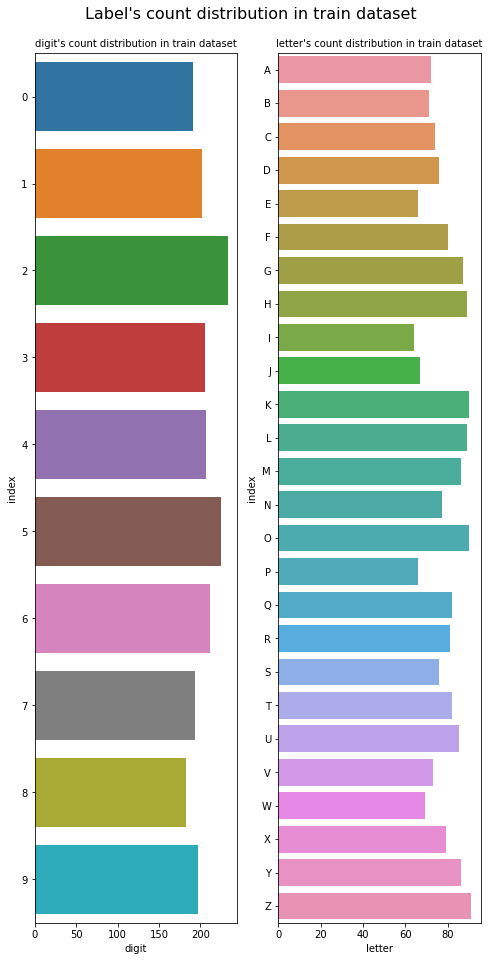

In [9]:
fig, axes = plt.subplots(figsize=[8,16],nrows=1,ncols=2)

target_cols = ["digit","letter"]

for idx, ax in enumerate(axes):

    column = target_cols[idx]
    dummy = df_train[column].value_counts().sort_index().reset_index()
    sns.barplot(data=dummy,x=column,y="index",orient='h',ax=ax,)

    ax.set_title(f"{column}'s count distribution in train dataset",fontsize=10)

plt.suptitle("Label's count distribution in train dataset",y=0.92,fontsize=16)

In [10]:
unq_letters = df_train.letter.value_counts().sort_index().index
idx_letter_dict = { idx:letter for idx, letter in enumerate(unq_letters) }
letter_idx_dict = { letter:idx for idx, letter in idx_letter_dict.items() }

In [11]:
# df_train.loc[:,"letter"] = df_train.letter.apply(lambda x:letter_idx_dict[x])

In [12]:
# fig, axes = plt.subplots(figsize=[8,16],nrows=1,ncols=2)

# target_cols = ["digit","letter"]

# for idx, ax in enumerate(axes):

#     column = target_cols[idx]
#     dummy = df_train[column].value_counts().sort_index().reset_index()
#     sns.barplot(data=dummy,x=column,y="index",orient='h',ax=ax,)

#     ax.set_title(f"{column}'s count distribution in train dataset",fontsize=10)

# plt.suptitle("Label's count distribution in train dataset",y=0.92,fontsize=16)

490


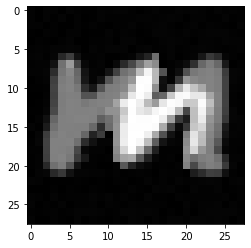

In [13]:
rand_num = np.random.randint(2048)
print(rand_num)
plt.imshow(df_train.loc[:,df_train.columns[3:]].iloc[rand_num].values.reshape(28,28),cmap="gray")

In [25]:
## FOLD별로 데이터셋을 분리하고, id이랑 character 붙이기.
import pickle
from tqdm import tqdm_notebook

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=101)
for fold, (trn_idx, valid_idx) in enumerate(kfold.split(X=df_train,y=df_train.digit)):
  df_train.loc[valid_idx,"fold"] = fold

df_train_imgs = df_train.loc[:,df_train.columns[3:-1]].values

def make_folder(directory_path):
  if not os.path.isdir(directory_path):
    os.mkdir(directory_path)

path_train = os.path.join(pj_home,'input/data/train')
make_folder(path_train)

for fold in range(5):
  fold_path = os.path.join(path_train,f'{fold}')
  make_folder(fold_path)

# path_test = os.path.join(pj_home,'input/data/test')
# make_folder(path_test)

## id_digit_letter 순으로 pkl명 생성
for idx,id in tqdm_notebook(enumerate(df_train.id.values)):
  img_id = id
  fold = df_train.loc[df_train.id==img_id,"fold"].values[0]
  digit = df_train.loc[df_train.id==img_id,"digit"].values[0]
  letter = df_train.loc[df_train.id==img_id,"letter"].values[0]
  img = df_train_imgs[idx,:]
  # http://taewan.kim/tip/python_pickle/ pickle 형태 저장
  with open(os.path.join(path_train,'%d/%d_%d_%c.pkl'%(fold,img_id,digit,letter)),'wb') as f:
    pickle.dump(img,f)
  # pickle data load
  # with open(os.path.join(path_train,'1/1_L.pkl'), 'rb') as f:
  #   img = pickle.load(f)

In [15]:
!pip install albumentations
!pip install opencv-python

     |████████████████████████████████| 634kB 8.6MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654021 sha256=91e1b406cee8fbe00c04f83b238c73591acafd02590c1f0629ebbf27b85563f3
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [16]:
import albumentations as A
from albumentations.pytorch import ToTensor

train_transforms = A.Compose([
        A.Rotate(20),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    #pytorch가 학습에 사용할 수 있는 형태로 Image를 출력(HWC -> CHW)
    ToTensor()
    ])

valid_transforms = A.Compose([
    #pytorch가 학습에 사용할 수 있는 형태로 Image를 출력(HWC -> CHW)
    ToTensor()
    ])

In [17]:
from torchvision import transforms


train_transforms2= transforms.Compose([
  transforms.ToPILImage(),
  #agu.ImageNetPolicy(),
  
  # transforms.Resize([img_size,img_size]),
  #transforms.RandomResizedCrop(int(img_size*0.8)),
  transforms.RandomRotation(30),
  transforms.RandomHorizontalFlip(),
  transforms.RandomRotation(20),
  transforms.Grayscale(num_output_channels=1),
  #transforms.Resize([img_size,img_size]),
  transforms.ToTensor(),
  transforms.Normalize([0.5], [0.5])
])
valid_transforms2 = transforms.Compose([
    transforms.ToPILImage(),
    # transforms.Grayscale(num_output_channels=1),
    # transforms.Resize([img_size,img_size]),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
  ])

In [18]:
path_train

'/gdrive/My Drive/colab/EMNST_DACON/input/data/train'

In [19]:
np.random.seed(101)
valid_fold = np.random.randint(5)
train_folds = [idx for idx in range(5) if idx != valid_fold]

In [26]:
import re
pattern = '[0-9]+_[0-9]_[A-Z]'

trn_dict = dict()
val_dict = dict()
idx = 0
for trn_fold in train_folds:
  fold_path = os.path.join(path_train,str(trn_fold))
  for dir_name, _, file_names in os.walk(fold_path):
    for file_name in file_names:
      img_str= re.search(pattern,file_name).group()
      img_id, img_digit, img_letter = img_str.split("_")
      img_path = os.path.join(fold_path,file_name)
      # pickle data load
      with open(img_path, 'rb') as f:
        img = pickle.load(f)
        trn_dict[idx] = {"img_id":img_id, "digit":img_digit, "letter":img_letter, "img":img}
        idx +=1  

idx = 0
fold_path = os.path.join(path_train,str(valid_fold))
for dir_name, _, file_names in os.walk(fold_path):
  for file_name in file_names:
    img_str= re.search(pattern,file_name).group()
    img_id, img_digit, img_letter = img_str.split("_")
    img_path = os.path.join(fold_path,file_name)
    # pickle data load
    with open(img_path, 'rb') as f:
      img = pickle.load(f)
      val_dict[idx] = {"img_id":img_id, "digit":img_digit,"letter":img_letter, "img":img}  
      idx +=1

In [27]:
img_path

'/gdrive/My Drive/colab/EMNST_DACON/input/data/train/3/2045_1_L.pkl'

In [37]:
from  torch.utils.data import Dataset
import torch

class Emnst_Datset(Dataset):
  def __init__(self,img_dict,img_height,img_width,transform):
    self.img_dict = img_dict
    self.img_height = img_height
    self.img_width = img_width
    self.transform = transform

  def __len__(self):
    return len(self.img_dict)

  def __getitem__(self,index):
    img_dict = self.img_dict[index]
    img_id = img_dict["img_id"]
    img = img_dict["img"].reshape(self.img_height,self.img_width)
    digit = img_dict["digit"]
    letter = img_dict["letter"]
    img = img.astype("uint8")
    img = img[:,:,np.newaxis]
    img = np.repeat(img,3,2)

    if self.transform is not None:
      img = self.transform(image=img)["image"]

    digit = np.uint8(digit)

    return img, torch.tensor(digit,dtype=torch.long)

In [38]:
from  torch.utils.data import Dataset

class Emnst_Datset2(Dataset):
  def __init__(self,img_dict,img_height,img_width,transform):
    self.img_dict = img_dict
    self.img_height = img_height
    self.img_width = img_width
    self.transform = transform

  def __len__(self):
    return len(self.img_dict)

  def __getitem__(self,index):
    img_dict = self.img_dict[index]
    img_id = img_dict["img_id"]
    img = img_dict["img"].reshape(self.img_height,self.img_width)
    digit = img_dict["digit"]
    letter = img_dict["letter"]
    img = img.astype("uint8")

    if self.transform is not None:
      img = self.transform(img)

    digit = np.uint8(digit)

    return img, torch.tensor(digit,dtype=torch.long)

In [39]:
len(trn_dict)

1639

In [40]:
trn_dataset = Emnst_Datset(img_dict=trn_dict,img_height=28,img_width=28,transform=train_transforms)
val_dataset = Emnst_Datset(img_dict=val_dict,img_height=28,img_width=28,transform=valid_transforms)

In [41]:
trn_dataset2 = Emnst_Datset2(img_dict=trn_dict,img_height=28,img_width=28,transform=train_transforms2)
val_dataset2 = Emnst_Datset2(img_dict=val_dict,img_height=28,img_width=28,transform=valid_transforms2)

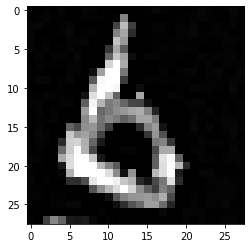

In [42]:
plt.imshow(trn_dataset[0][0].permute(1,2,0),cmap="gray")

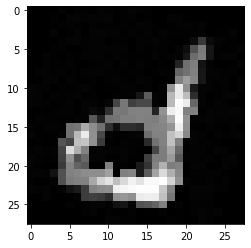

In [43]:
plt.imshow(trn_dataset2[0][0].reshape(28,28),cmap="gray")

In [44]:
from torch.utils.data import Dataset, DataLoader

trn_loader = DataLoader(trn_dataset, batch_size=16,shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16,shuffle=False)

trn_loader2 = DataLoader(trn_dataset2, batch_size=16,shuffle=True)
val_loader2 = DataLoader(val_dataset2, batch_size=16,shuffle=False)

In [45]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [49]:
import torch.nn as nn
class EMNST_CNN(nn.Module):
  def __init__(self):
    super(EMNST_CNN,self).__init__()

    self.layer1 = self.conv_module(1,16)
    self.layer2 = self.conv_module(16,24)
    self.layer3 = self.conv_module(24,32)
    self.layer4 = self.conv_module(32,64)
    self.layer5 = self.conv_module(64,128)
    self.fc_layer = self.global_avg_pool(128,10)
  
  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.layer5(out)
    out = self.fc_layer(out)
    out = out.view(-1,10)

    return out

  def conv_module(self, in_num, out_num):
    return nn.Sequential(
        nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_num),
        nn.LeakyReLU(),
        nn.MaxPool2d(kernel_size=3, stride=1)
    )

  def global_avg_pool(self, in_num, out_num):
    return nn.Sequential(
        nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_num),
        nn.LeakyReLU(),
        nn.AdaptiveAvgPool2d((1,1))
    )

In [50]:
cnn = EMNST_CNN()

In [52]:
import torch.optim as optim
# loss
criterion = nn.CrossEntropyLoss()
# backpropagation method
learning_rate = 1e-3
optimizer = optim.Adam(cnn.parameters(), lr=learning_rate)

In [53]:
# hyper-parameters
num_epochs = 100

In [55]:
cnn

EMNST_CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(32

In [60]:

# use_cuda = torch.cuda.is_available()
# import itertools
# num_batches = len(trn_loader2)

# # # create figure for plotting
# # row_num = 2
# # col_num = 4
# # fig, ax = plt.subplots(row_num, col_num, figsize=(6,6))
# # for i, j in itertools.product(range(row_num), range(col_num)):
# #     # ax[i,j].get_xaxis().set_visible(False)
# #     # ax[i,j].get_yaxis().set_visible(False) 
    
# trn_loss_list = []
# val_loss_list = []

# for epoch in range(num_epochs):
#     trn_loss = 0.0
#     for i, data in enumerate(trn_loader2):
#         x, label = data
#         if use_cuda:
#             x = x.cuda()
#             label = label.cuda()
#         # grad init
#         optimizer.zero_grad()
#         # forward propagation
#         model_output = cnn(x)
#         # calculate loss
#         loss = criterion(model_output, label)
#         # back propagation 
#         loss.backward()
#         # weight update
#         optimizer.step()
        
#         # trn_loss summary
#         trn_loss += loss.item()
#         # del (memory issue)
#         del loss
#         del model_output
        
#         # 학습과정 출력
#         if (i+1) % 100 == 0: # every 100 mini-batches
#             with torch.no_grad(): # very very very very important!!!
#                 val_loss = 0.0
#                 for j, val in enumerate(val_loader2):
#                     val_x, val_label = val
#                     if use_cuda:
#                         val_x = val_x.cuda()
#                         val_label =val_label.cuda()
#                     val_output = cnn(val_x)
#                     v_loss = criterion(val_output, val_label)
#                     val_loss += v_loss

#             # # draw last val dataset
#             # for k in range(row_num*col_num):
#             #     ii = k//col_num
#             #     jj = k%col_num
#             #     ax[ii,jj].cla() # clear the current axis
#             #     ax[ii,jj].imshow(val_x[k,:].data.cpu().numpy().reshape(28,28), cmap='Greys')
            
#             # display.clear_output(wait=True)
#             # display.display(plt.gcf()) # get a reference to a current figure
                
#             # print("label: {}".format(val_label[:row_num*col_num]))
#             # print("prediction: {}".format(val_output.argmax(dim=1)[:row_num*col_num]))
#             # del val_output
#             # del v_loss
            
#             print("epoch: {}/{} | step: {}/{} | trn loss: {:.4f} | val loss: {:.4f}".format(
#                 epoch+1, num_epochs, i+1, num_batches, trn_loss / 100, val_loss / len(val_loader2)
#             ))            
            
#             trn_loss_list.append(trn_loss/100)
#             val_loss_list.append(val_loss/len(val_loader2))
#             trn_loss = 0.0

epoch: 1/100 | step: 100/103 | trn loss: 2.1041 | val loss: 2.0885
epoch: 2/100 | step: 100/103 | trn loss: 2.0831 | val loss: 2.0577
epoch: 3/100 | step: 100/103 | trn loss: 2.0530 | val loss: 2.0202
epoch: 4/100 | step: 100/103 | trn loss: 2.0311 | val loss: 1.9870
epoch: 5/100 | step: 100/103 | trn loss: 1.9971 | val loss: 1.9811
epoch: 6/100 | step: 100/103 | trn loss: 1.9757 | val loss: 1.9170
epoch: 7/100 | step: 100/103 | trn loss: 1.9383 | val loss: 1.9085
epoch: 8/100 | step: 100/103 | trn loss: 1.9228 | val loss: 1.8521
epoch: 9/100 | step: 100/103 | trn loss: 1.9000 | val loss: 1.8452
epoch: 10/100 | step: 100/103 | trn loss: 1.8604 | val loss: 1.8310
epoch: 11/100 | step: 100/103 | trn loss: 1.8350 | val loss: 1.7955
epoch: 12/100 | step: 100/103 | trn loss: 1.8130 | val loss: 1.7388
epoch: 13/100 | step: 100/103 | trn loss: 1.7776 | val loss: 1.6979
epoch: 14/100 | step: 100/103 | trn loss: 1.7467 | val loss: 1.6857
epoch: 15/100 | step: 100/103 | trn loss: 1.7351 | val lo

Text(0, 0.5, 'loss')

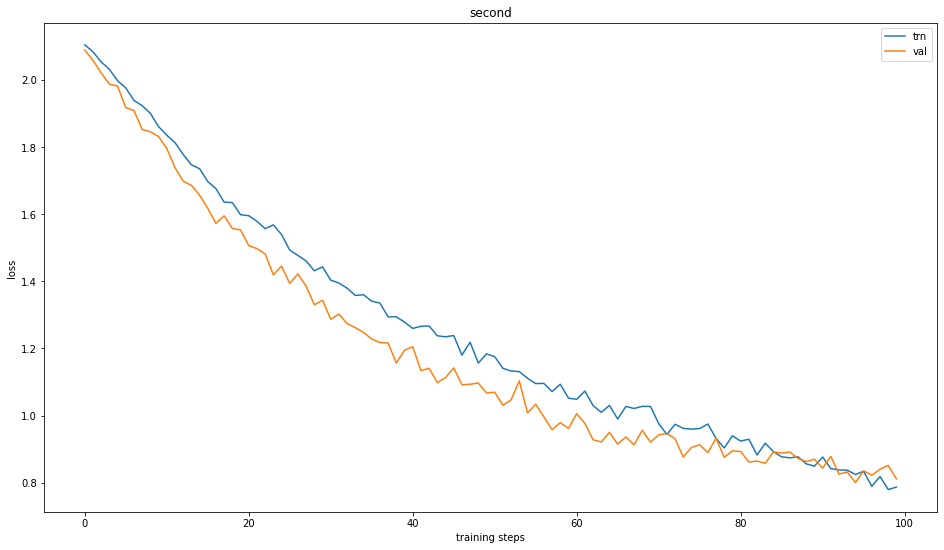

In [61]:
# plt.figure(figsize=(16,9))
# x_range = range(len(trn_loss_list))
# plt.plot(x_range, trn_loss_list, label="trn")
# plt.plot(x_range, val_loss_list, label="val")
# plt.legend()
# plt.title("second")
# plt.xlabel("training steps")
# plt.ylabel("loss")

In [62]:
# # val acc
# with torch.no_grad():
#     corr_num = 0
#     total_num = 0
#     for j, val in enumerate(val_loader2):
#         val_x, val_label = val
#         if use_cuda:
#             val_x = val_x.cuda()
#             val_label =val_label.cuda()
#         val_output = cnn(val_x)
#         model_label = val_output.argmax(dim=1)
#         corr = val_label[val_label == model_label].size(0)
#         corr_num += corr
#         total_num += val_label.size(0)

# print("acc: {:.2f}".format(corr_num / total_num * 100))

acc: 74.57


In [63]:
# # val acc
# with torch.no_grad():
#     corr_num = 0
#     total_num = 0
#     for j, val in enumerate(trn_loader2):
#         val_x, val_label = val
#         if use_cuda:
#             val_x = val_x.cuda()
#             val_label =val_label.cuda()
#         val_output = cnn(val_x)
#         model_label = val_output.argmax(dim=1)
#         corr = val_label[val_label == model_label].size(0)
#         corr_num += corr
#         total_num += val_label.size(0)

# print("acc: {:.2f}".format(corr_num / total_num * 100))

acc: 78.46


In [66]:
# torch.save(cnn, os.path.join(path_train,'EMNST_CNN_model.pth'))

Text(0, 0.5, 'loss')

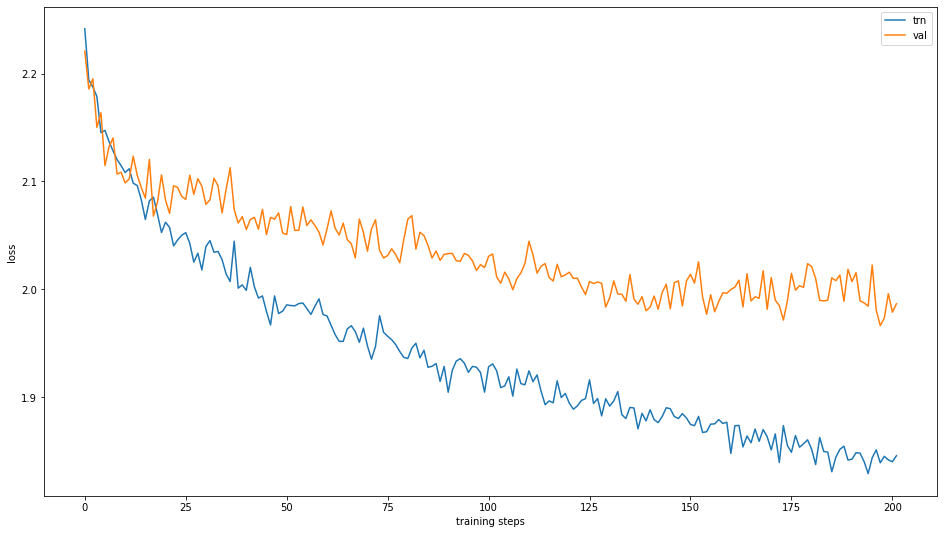

In [ ]:
# plt.figure(figsize=(16,9))
# x_range = range(len(trn_loss_list))
# plt.plot(x_range, trn_loss_list, label="trn")
# plt.plot(x_range, val_loss_list, label="val")
# plt.legend()
# plt.xlabel("training steps")
# plt.ylabel("loss")

In [ ]:
# # val acc
# with torch.no_grad():
#     corr_num = 0
#     total_num = 0
#     for j, val in enumerate(val_loader2):
#         val_x, val_label = val
#         if use_cuda:
#             val_x = val_x.cuda()
#             val_label =val_label.cuda()
#         val_output = cnn(val_x)
#         model_label = val_output.argmax(dim=1)
#         corr = val_label[val_label == model_label].size(0)
#         corr_num += corr
#         total_num += val_label.size(0)

# print("acc: {:.2f}".format(corr_num / total_num * 100))

acc: 46.70


In [ ]:
# # val acc
# with torch.no_grad():
#     corr_num = 0
#     total_num = 0
#     for j, val in enumerate(trn_loader2):
#         val_x, val_label = val
#         if use_cuda:
#             val_x = val_x.cuda()
#             val_label =val_label.cuda()
#         val_output = cnn(val_x)
#         model_label = val_output.argmax(dim=1)
#         corr = val_label[val_label == model_label].size(0)
#         corr_num += corr
#         total_num += val_label.size(0)

# print("acc: {:.2f}".format(corr_num / total_num * 100))

acc: 61.93


In [78]:
from torch.optim import lr_scheduler

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, factor=0.1,patience=5)

In [134]:
import copy 
import time
def train_model(model, criterion, optimizer,scheduler,num_epochs=8):

  trn_info = dict()
  val_info = dict()
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0

  for epoch in range(num_epochs):
    epoch_since = time.time()

    running_loss = 0
    running_corrects = 0

    model.train()

    for idx, data in enumerate(trn_loader2):
      inputs, labels = data 
      
      optimizer.zero_grad()
      outputs= model(inputs)
      _, preds = torch.max(outputs,1)
      loss = criterion(outputs,labels)

      loss.backward()
      
      optimizer.step()

      running_loss += loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data).item()
    
    trn_dataset_size = len(trn_loader2.dataset)
    trn_loss = running_loss / trn_dataset_size
    trn_acc = running_corrects / trn_dataset_size

    trn_info[epoch+1]= {"trn_loss":trn_loss,"trn_acc":trn_acc}

    model.eval()

    running_loss = 0
    running_corrects = 0

    if epoch > 0:
      scheduler.step(val_loss)

    with torch.no_grad():
      for idx, data in enumerate(val_loader2):
        inputs, labels = data

        val_outputs = model(inputs)
        _, preds = torch.max(val_outputs,1)
        loss = criterion(val_outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data).item()

      val_dataset_size = len(val_loader2.dataset)
      val_loss = running_loss / val_dataset_size
      val_acc = running_corrects / val_dataset_size

      val_info[epoch+1]= {"val_loss":val_loss,"val_acc":val_acc}
    
    print("epoch: {}/{} | trn loss: {:.4f} | val loss: {:.4f} | trn acc: {:.4f} | val acc: {:.4f}".format(
            epoch+1, num_epochs, trn_info[epoch+1]["trn_loss"], val_info[epoch+1]["val_loss"], trn_info[epoch+1]["trn_acc"], val_info[epoch+1]["val_acc"]
            ))
    if val_acc > best_acc:
      prev_best_acc = best_acc
      best_acc = val_acc
      best_model_wts = copy.deepcopy(model.state_dict())
      print("Validation Accuracy Increased from {:.4f} to {:.4f}. Saving model.....".format(prev_best_acc,best_acc))
      torch.save(model.state_dict, os.path.join(path_train,'EMNST_CNN2_model.pth'))

    lr_get = get_lr(optimizer)
    print('Current learning rate : {:.8f}'.format(lr_get))

    
    epoch_elapsed = time.time() - epoch_since
    print("epoch trained in {:.0f}m {:.0f}s".format(
        epoch_elapsed // 60, epoch_elapsed % 60
    ))

  time_elapsed = time.time() - since
  print("Training complete in {:.0f}m {:.0f}s".format(
      time_elapsed // 60, time_elapsed % 60
  ))
  print("Best val Acc: {:.4f}".format(best_acc))
  
  model.load_state_dict(best_model_wts)
  return model

def get_lr(optimizer):
  for param_group in optimizer.param_groups:
    return param_group["lr"]    

In [ ]:
import torch.optim as optim
from torch.optim import lr_scheduler

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, factor=0.1,patience=5)

In [135]:
trained_model = train_model(cnn,criterion=criterion,optimizer=optimizer_ft,scheduler=exp_lr_scheduler,num_epochs=100)

epoch: 1/100 | trn loss: 0.6325 | val loss: 0.7566 | trn acc: 0.8218 | val acc: 0.7677
Validation Accuracy Increased from 0.0000 to 0.7677. Saving model.....
Current learning rate : 0.00100000
epoch trained in 0m 21s
epoch: 2/100 | trn loss: 0.6403 | val loss: 0.7035 | trn acc: 0.8127 | val acc: 0.7653
Current learning rate : 0.00100000
epoch trained in 0m 21s
epoch: 3/100 | trn loss: 0.6585 | val loss: 0.6971 | trn acc: 0.8066 | val acc: 0.7702
Validation Accuracy Increased from 0.7677 to 0.7702. Saving model.....
Current learning rate : 0.00100000
epoch trained in 0m 21s
epoch: 4/100 | trn loss: 0.6496 | val loss: 0.7459 | trn acc: 0.8005 | val acc: 0.7628
Current learning rate : 0.00100000
epoch trained in 0m 21s
epoch: 5/100 | trn loss: 0.6618 | val loss: 0.7056 | trn acc: 0.8011 | val acc: 0.7848
Validation Accuracy Increased from 0.7702 to 0.7848. Saving model.....
Current learning rate : 0.00010000
epoch trained in 0m 21s
epoch: 6/100 | trn loss: 0.6492 | val loss: 0.7216 | trn 

In [137]:
test_transforms2 = transforms.Compose([
    transforms.ToPILImage(),
    # transforms.Grayscale(num_output_channels=1),
    # transforms.Resize([img_size,img_size]),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
  ])

In [139]:
df_test.head()

,id,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,0,0,1,0,1,3,4,4,0,0,2,4,4,1,3,3,2,2,4,1,0,1,2,2,1,2,2,1,4,0,...,1,3,1,1,3,3,4,1,3,1,2,4,1,2,0,3,1,2,4,0,2,1,2,4,1,1,3,2,1,0,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,2,1,0,3,0,1,1,4,1,2,0,2,2,0,4,3,4,0,2,4,4,2,1,2,4,0,4,2,0,2,...,3,4,2,6,2,2,0,1,2,4,1,1,3,3,2,3,4,2,2,4,3,1,3,3,3,1,3,4,4,2,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,2,1,2,0,1,0,3,0,1,4,3,0,0,3,0,4,1,0,3,2,0,4,1,2,0,0,1,3,0,2,...,0,4,4,3,4,1,4,2,3,4,1,2,0,2,2,3,3,1,1,4,1,2,4,0,0,0,0,2,3,2,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,0,2,3,2,3,4,4,4,0,1,4,2,2,0,1,4,3,1,3,0,2,3,2,4,3,1,1,4,0,0,...,0,4,1,1,2,3,2,3,3,0,0,1,3,3,0,2,0,0,2,3,2,2,3,1,1,2,4,0,1,2,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,1,1,4,3,4,1,2,1,4,3,3,4,0,4,4,2,0,0,0,0,3,4,0,1,4,2,2,2,1,4,...,4,1,3,2,1,2,1,4,4,1,2,3,2,4,2,1,4,3,4,3,0,1,0,1,1,2,1,1,0,2,4,3,1,4,0,2,1,2,3,4


In [142]:
def make_folder(directory_path):
  if not os.path.isdir(directory_path):
    os.mkdir(directory_path)

df_test_imgs = df_test.loc[:,df_test.columns[2:]].values
path_test = os.path.join(pj_home,'input/data/test')
make_folder(path_test)

## id_digit_letter 순으로 pkl명 생성
for idx,id in tqdm_notebook(enumerate(df_test.id.values)):
  img_id = id
  letter = df_test.loc[df_test.id==img_id,"letter"].values[0]
  img = df_test_imgs[idx,:]
  # http://taewan.kim/tip/python_pickle/ pickle 형태 저장
  with open(os.path.join(path_test,'%d_%c.pkl'%(img_id,letter)),'wb') as f:
    pickle.dump(img,f)

In [143]:
path_test

'/gdrive/My Drive/colab/EMNST_DACON/input/data/test'

In [148]:
import re
pattern = '[0-9]+_[A-Z]'

test_dict = dict()

idx = 0
for dir_name, _, file_names in os.walk(path_test):
  for file_name in tqdm_notebook(file_names):
    img_str= re.search(pattern,file_name).group()
    img_id, img_letter = img_str.split("_")
    img_path = os.path.join(path_test,file_name)
    # pickle data load
    with open(img_path, 'rb') as f:
      img = pickle.load(f)
      test_dict[idx] = {"img_id":img_id, "letter":img_letter, "img":img}  
      idx+=1

In [186]:
from  torch.utils.data import Dataset

class Emnst_Datset3(Dataset):
  def __init__(self,img_dict,img_height,img_width,transform):
    self.img_dict = img_dict
    self.img_height = img_height
    self.img_width = img_width
    self.transform = transform

  def __len__(self):
    return len(self.img_dict)

  def __getitem__(self,index):
    img_dict = self.img_dict[index]
    img_id = int(img_dict["img_id"])
    img = img_dict["img"].reshape(self.img_height,self.img_width)
    # digit = img_dict["digit"]
    letter = img_dict["letter"]
    img = img.astype("uint8")

    if self.transform is not None:
      img = self.transform(img)

    return img, torch.tensor(img_id,dtype=torch.long)

In [187]:
test_dataset2 = Emnst_Datset3(img_dict=test_dict,img_height=28,img_width=28,transform=test_transforms2)
test_loader2 = DataLoader(test_dataset2, batch_size=16,shuffle=False)

In [218]:
def test_model(model):
  
  result_dict = dict()

  with torch.no_grad():
    for input, ids in tqdm_notebook(test_loader2):
      output = model(input)
      output = torch.argmax(output,dim=1)

      ids = ids.data.numpy()
      output = output.data.numpy()
      
      for idx, id in enumerate(ids):
        result_dict[id] = output[idx]

  return result_dict
      
output = test_model(trained_model)

In [226]:
submission = pd.read_csv(os.path.join(data_home,'submission.csv'))
submission.loc[:,"digit"] = submission.id.apply(lambda x: output[x])

In [227]:
submission.head()

,id,digit
0,2049,6
1,2050,9
2,2051,6
3,2052,0
4,2053,3


In [230]:
submission.to_csv(os.path.join(data_home,'results.csv'),index=False)